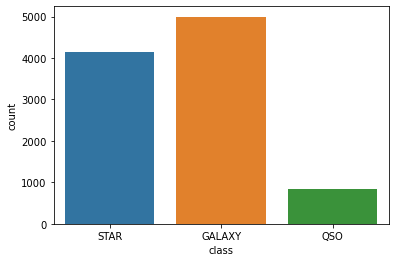

In [89]:
# Carga del dataset
import pandas as pd
import seaborn as sns
df = pd.read_csv("SDSS-DR14.csv")

import matplotlib.pyplot as plt

sns.countplot(x="class", data=df)
plt.show()

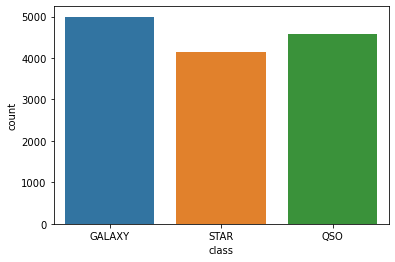

In [90]:

#Aplicamos random oversampling para elevar la cantidad de QSO y así balancear el dataset
class_values=df['class'].value_counts()

from sklearn.utils import resample

df_galaxy = df[df['class']=='GALAXY']
df_star = df[df['class']=='STAR']
df_qso = df[df['class']=='QSO']

df_qso = df_qso.sample((class_values[0]+class_values[1])//2,replace=True)

df_over = pd.concat([df_galaxy, df_star, df_qso], axis=0)

sns.countplot(x="class", data=df_over)
plt.show()

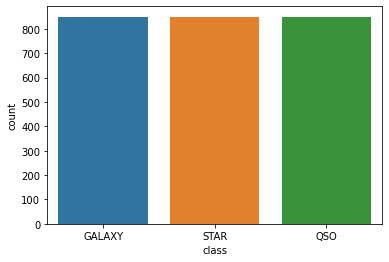

In [91]:
#Aplicamos random undersampling para disminuir la cantidad de GALAXY Y STAR y así balancear el dataset
class_values=df2['class'].value_counts()

from sklearn.utils import resample

df_galaxy = df[df['class']=='GALAXY']
df_star = df[df['class']=='STAR']
df_qso = df[df['class']=='QSO']

df_galaxy = df_galaxy.sample(class_values[2])
df_star = df_star.sample(class_values[2])
df_under = pd.concat([df_galaxy, df_star, df_qso], axis=0)


sns.countplot(x="class", data=df_under)
plt.show()

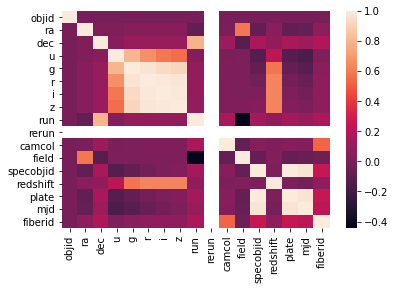

In [74]:
corr = corr = df.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [75]:
#Eliminaremos las variables que presentan una alta correlación entre sí(r,i,z,rerun, plate,mjd)
df = df.drop(['objid','specobjid','g','r','i','z','rerun','plate','mjd'], 1)

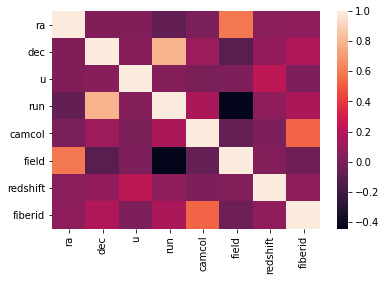

In [76]:
corr = corr = df.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [77]:
## Vemos cuales variables presentan una falta de datos
df.isnull().sum()

ra          0
dec         0
u           0
run         0
camcol      0
field       0
class       0
redshift    0
fiberid     0
dtype: int64

In [78]:
X = df.iloc[:,[0,1,2,3,4,5,7,8]]
y = df.iloc[:,6]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=811)
# Feature Scaling
from sklearn.preprocessing import StandardScaler


from sklearn import tree

#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [80]:
#Predicciones
y_pred = clf.predict(X_test)

#Evaluación del rendimiento del clasificador

from sklearn.metrics import confusion_matrix
confusion_matrix_tree = confusion_matrix(y_test, y_pred)

print()
print("Matriz de confusion")
print(confusion_matrix_tree)

#Print de la matriz de confusión

from sklearn.metrics import classification_report
print()
print("Recall y precision")
print(classification_report(y_test, y_pred))


Matriz de confusion
[[1445   26    1]
 [   2 1365    0]
 [   3    0 1276]]

Recall y precision
              precision    recall  f1-score   support

      GALAXY       1.00      0.98      0.99      1472
         QSO       0.98      1.00      0.99      1367
        STAR       1.00      1.00      1.00      1279

   micro avg       0.99      0.99      0.99      4118
   macro avg       0.99      0.99      0.99      4118
weighted avg       0.99      0.99      0.99      4118



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 95)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix_log = confusion_matrix(y_test, y_pred)

print()
print("Matriz de confusion")
print(confusion_matrix_log)

print()
print("Recall y precision")
print(classification_report(y_test, y_pred))



Matriz de confusion
[[1458    9    5]
 [   2 1365    0]
 [   1    0 1278]]

Recall y precision
              precision    recall  f1-score   support

      GALAXY       1.00      0.99      0.99      1472
         QSO       0.99      1.00      1.00      1367
        STAR       1.00      1.00      1.00      1279

   micro avg       1.00      1.00      1.00      4118
   macro avg       1.00      1.00      1.00      4118
weighted avg       1.00      1.00      1.00      4118



In [82]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

#Predicciones
y_pred = LogReg.predict(X_test)

#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix_log = confusion_matrix(y_test, y_pred)

print()
print("Matriz de confusion")
print(confusion_matrix_log)

print()
print("Recall y precision")
print(classification_report(y_test, y_pred))

/home/wrathion/anaconda3/envs/ia2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wrathion/anaconda3/envs/ia2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


coeficientes del modelo: [[ 2.16922645e-03  1.14484364e-03  5.05376096e-01  3.19065076e-04
   4.01093320e-02 -2.22374886e-04 -3.18099407e+00 -1.01838591e-03]
 [-3.45534412e-03  4.38872717e-03 -2.06384905e-01  4.82635668e-05
  -1.88820026e-02  8.14566676e-04  1.66749741e+01  5.93393553e-04]
 [-5.58934202e-05 -3.61837160e-04 -9.64806181e-02 -4.94984113e-04
  -2.04467174e-02 -2.79202829e-04 -3.59694471e+01  6.62210399e-04]]
intercept: [-9.68191518 -0.16882463  3.26885872]

Matriz de confusion
[[1295    5  172]
 [  92 1272    3]
 [  53    0 1226]]

Recall y precision
              precision    recall  f1-score   support

      GALAXY       0.90      0.88      0.89      1472
         QSO       1.00      0.93      0.96      1367
        STAR       0.88      0.96      0.91      1279

   micro avg       0.92      0.92      0.92      4118
   macro avg       0.92      0.92      0.92      4118
weighted avg       0.92      0.92      0.92      4118

